# _`expression`_.`expansion()`

Compute the _expansion_ of a weighted expression.  An expansion is a structure that combines three different features of a (weighted) rational expression $r$:
- its _constant-term_, i.e., the weight associated to the empty word, denoted $c(r)$
- its _firsts_, i.e., the set of labels that prefix the defined language, denoted $f(r)$
- its _derived-terms_, i.e., for each label $a$, its associated polynomials of "subsequent" expressions, denoted $\frac{\partial}{\partial a}r$.

If one denotes $d(r)$ the expansion of $r$, it holds that:
$$
  d(r) = c(r) \oplus \bigoplus_{a \in f(r)} a \odot \frac{\partial}{\partial a}r
$$

The main use of expansions (and derivations) is to compute the derived-term automaton of an expression.  The advantage of expansions over derivations is their independence with respect to the alphabet.  As a matter of fact, they do not require a finite-alphabet (see examples below).  Besides, the reunite constant-term, first, and derivation into a single concept.

See also:
- [_expression_.constant_term](expression.constant_term.ipynb)
- [_expression_.derivation](expression.derivation.ipynb)
- [_expression_.derived_term](expression.derived_term.ipynb)

References:
- [demaille.2016.ictac](References.ipynb#demaille.2016.ictac) introduces expansions

## Examples

The following function will prove handy to demonstrate the relation between the expansion on the one hand, and, on the other hand, the constant-term and the derivations.  It takes an expression $r$ and a list of letters, and returns a $\LaTeX$ `aligned` environment to display:
1. $d(r)$ the expansion
2. $c(r)$ the constant-term
3. $\frac{\partial}{\partial a}r$ the derivation with respect to $a$.

In [1]:
import vcsn
from IPython.display import Latex

def diffs(e, ss):
    eqs = [r'd\left({0:x}\right) &= {1:x}'.format(e, e.expansion()),
           r'c\left({0:x}\right) &= {1:x}'.format(e, e.constant_term())]
    for s in ss:
        eqs.append(r'\frac{{\partial}}{{\partial {0}}} {1:x} &= {2:x}'
                   .format(s, e, e.derivation(s)))
    return Latex(r'''\begin{{aligned}}
        {eqs}
    \end{{aligned}}'''.format(eqs=r'\\'.join(eqs)))

### Classical Expressions

In the classical case (labels are letters, and weights are Boolean), this is the construct as described by Antimirov.

In [2]:
b = vcsn.context('[ab]')
e = b.expression('[ab]{3}')
e.expansion()

a⊙[(a+b)²] ⊕ b⊙[(a+b)²]

Or, using the `diffs` function we defined above:

In [3]:
diffs(e, ['a', 'b'])

<IPython.core.display.Latex object>

### Weighted Expressions

Of course, expressions can be weighted.

In [4]:
q = vcsn.context('[abc] -> q')
e = q.expression('(<1/6>a*+<1/3>b*)*')
diffs(e, ['a', 'b'])

<IPython.core.display.Latex object>

And this is tightly connected with the construction of the derived-term automaton.

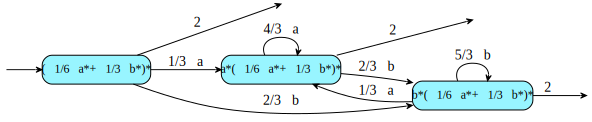

In [5]:
e.derived_term()

### Breaking expansion

There is (currently) no means to break an expansion (which would mean breaking its polynomials).  The construction of the derived-term automaton does it on the fly.

### Non-free labelsets

Contrary to derivation, which requires a finite alphabet, expansions support labels which are words, or even tuples.

Below, we define a two-tape-of-words context, and a simple expression that uses three different multitape labels: $(\mathrm{11}|\mathrm{eleven})$, etc.  Then `derived_term` is used to build the automaton.

In [6]:
ctx = vcsn.context('[0-9]* x [a-zA-Z]* -> B')
ctx

[0123456789]* × [ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz]* → 𝔹

In [7]:
e = ctx.expression("(11|eleven + 12|twelve + 13|thirteen)*")
e

(11|eleven+12|twelve+13|thirteen)*

In [8]:
e.expansion()

⟨1⟩ ⊕ 11|eleven⊙[(11|eleven+12|twelve+13|thirteen)*] ⊕ 12|twelve⊙[(11|eleven+12|twelve+13|thirteen)*] ⊕ 13|thirteen⊙[(11|eleven+12|twelve+13|thirteen)*]

This enables the construction of the associated derived-term automaton.

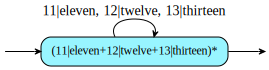

In [9]:
e.derived_term()